In [1]:
import warnings
import getdata
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
plt.style.use('matplotlib.mplstyle')

In [1]:
## Example write data

def operation(file_name, size):
    f  = open(file_name, "w")
    for i in range(1, size):
        f.write(str(i)+'\n')
    f.close()
    
#operation("/mnt/data/sample.txt", 200000000)


In [2]:
# Download data
getdata.download("https://raw.githubusercontent.com/vharsh/datasets/master/gender_degree_data.tsv", "/mnt/data/gender_degree_data.tsv")

In [2]:
degree_gender_data = pd.read_csv('/mnt/data/gender_degree_data.tsv', sep='\t')
degree_gender_data = degree_gender_data[degree_gender_data['Year'] >= 1970]
degree_gender_data.set_index('Year', inplace=True)

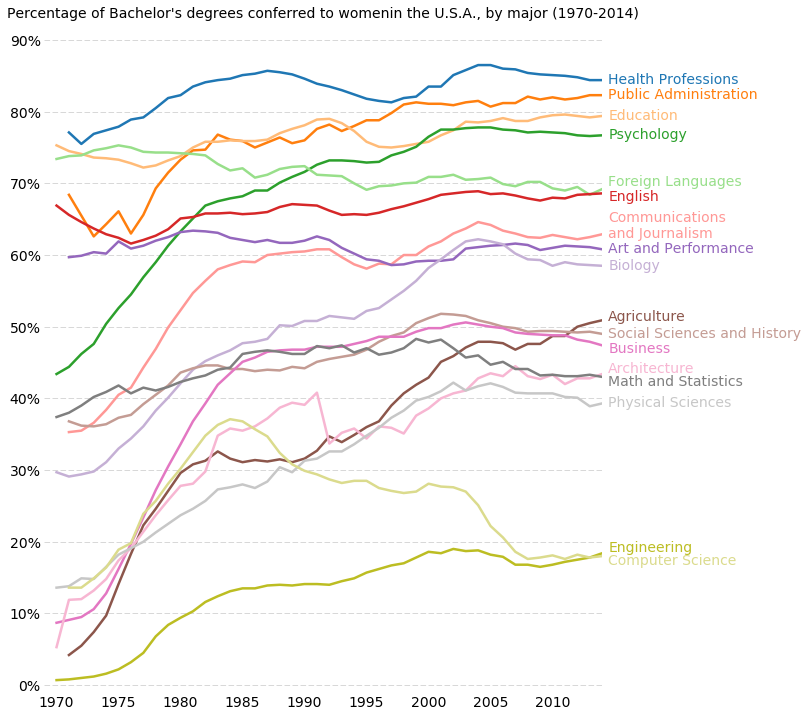

In [3]:
# Create a list of the degree majors ranked by their last value in the time series
degree_major_order = degree_gender_data.groupby('Degree_Major')['Female_percent_Bachelors'].last()
degree_major_order = degree_major_order.sort_values(ascending=False).index.values
# used to determine what colors the degree majors are assigned
degree_major_order_dict = dict(zip(degree_major_order, range(len(degree_major_order))))

degree_gender_data['Degree_Major_Order'] = degree_gender_data[
    'Degree_Major'].apply(lambda major: degree_major_order_dict[major])

degree_gender_data.groupby('Degree_Major_Order')['Female_percent_Bachelors'].plot(figsize=(10, 12))

plt.xlabel('')
plt.yticks(range(0, 91, 10), ['{}%'.format(x) for x in range(0, 91, 10)])

plt.xlim(1969, 2014)
plt.ylim(-1, 90)

plt.title('Percentage of Bachelor\'s degrees conferred to women'
          'in the U.S.A., by major (1970-2014)\n', fontsize=14)
plt.grid(False, axis='x')

degree_major_pcts = dict(degree_gender_data.groupby(
        'Degree_Major')['Female_percent_Bachelors'].last().iteritems())

degree_major_color_map = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

# shorten names
degree_major_name_map = {
    'the social sciences and history': 'Social Sciences and History',
    'the health professions and related programs': 'Health Professions',
    'visual and performing arts': 'Art and Performance',
    'foreign languages and literatures': 'Foreign Languages',
    'engineering and engineering technologies': 'Engineering',
    'the biological and biomedical sciences': 'Biology',
    'mathematics and statistics': 'Math and Statistics',
    'agriculture and natural resources': 'Agriculture',
    'the physical sciences and science technologies': 'Physical Sciences',
    'communication, journalism, and related '
    'programs and in communications technologies': 'Communications\nand Journalism',
    'public administration and social services': 'Public Administration',
    'psychology': 'Psychology',
    'English language and literature/letters': 'English',
    'computer and information sciences': 'Computer Science',
    'education': 'Education',
    'business': 'Business',
    'architecture and related services': 'Architecture',
}

# offsets prevent labels from overlapping
degree_major_offset_map = {
    'foreign languages and literatures': 1.0,
    'English language and literature/letters': -0.5,
    'agriculture and natural resources': 0.5,
    'business': -0.5,
    'architecture and related services': 0.75,
    'mathematics and statistics': -0.75,
    'engineering and engineering technologies': 0.75,
    'computer and information sciences': -0.75,
}

# draw degree major labels at the end of the time series lines
for degree_major in degree_major_pcts:
    plt.text(2014.5, degree_major_pcts[degree_major] - 0.5 + degree_major_offset_map.get(degree_major, 0),
             degree_major_name_map[degree_major],
             color=degree_major_color_map[degree_major_order_dict[degree_major]])

plt.savefig('result.png')